# Measles Open SEIR Model

Importing libraries: [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [matplotlib](https://matplotlib.org/)

In [6]:
import aux
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore",category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

Model's equations:

$\lambda(t) = \frac{\beta}{N} * I(t)$

$\dot{S(t)} = m * N - (\lambda * S(t) + m * S(t))$

$\dot{E(t)} = \lambda * S(t) - (f * E(t) + m * E(t))$

$\dot{I(t)} = f * E(t) - (r * I(t) + m * I(t))$

$\dot{R(t)} = r * I(t) - (m * R(t))$

With variables:

* $S$: Susceptibles
* $E$: Exposed
* $I$: Infective
* $R$: Recovered
* $N$: Total population
* $f$: Rate of progression from latent to infectious 
* $m$: Death/Birth rate
* $\beta$: Infectious people contact rate
* $r$: Recovery rate

Converted into code:

In [2]:
def dSEIR_Open(y, t, N, R0, f, r, m):
    S, E, I, R = y
    # Defining the beta conditions
    betaBase = R0 * (r + m)
    betaH = betaBase
    betaT = 5 * betaBase
    # Testing for holiday
    partA = [(t % 365 > day) for day in (50, 105, 220, 315)]
    partB = [(t % 365 < day) for day in (57, 120, 235, 365)]
    holidayTests = [i[0] and i[1] for i in zip(partA, partB)]
    holiday = any(holidayTests)
    # Calculate beta
    if holiday is True:
        beta = betaH
    else:
        beta = betaT
    # Equations system
    dSdt = m * N -beta * S * I / N - m * S
    dEdt = beta * S * I / N - f * E - m * E
    dIdt = f * E - r * I - m * I
    dRdt = r * I - m * R
    return dSdt, dEdt, dIdt, dRdt

Defining initial parameters for the model and simulation:
* **N**: Total population
* **tmax**: Simulated time (days)
* **eInit, iInit, rInit**: Initial exposed, infected and recovered populations
* **R0**: Basic reproductive number
* **lP**: Latent period
* **iP**: Infectious period

In [28]:
(N, tmax) = (1000, 365 * 25)
(R0, lP, iP, lE) = (3.25, 8, 7, 70)
(iInit, eInit, rInit) = (1, 0, 0)

Calculating internal variables and running the system:

In [29]:
(f, r, m) = (1/lP, 1/iP, 1/(lE * 365))
sInit = N - (eInit + iInit + rInit)
y0 = (sInit, iInit, eInit, rInit)
t = np.linspace(0, tmax, tmax)
ret = odeint(dSEIR_Open, y0, t, args=(N, R0, f, r, m))
S, E, I, R = ret.T

Plotting

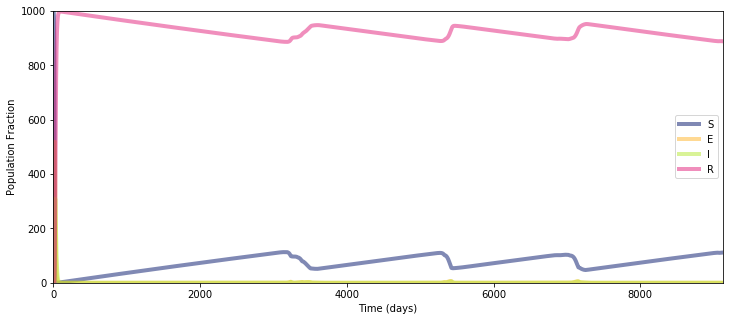

In [30]:
# Defining triplets: (series, color, label)
triplets = (
    (S, '#02146b', 'S'), (E, '#ffb428', 'E'), 
    (I, '#b4e830', 'I'), (R, '#e21e7b', 'R')
)
# Plotting
(fig, ax) = aux.plotEpiDynamicsPop(triplets, t, tmax, N, lw=4)
plt.savefig('./img/Measles.png', dpi=500, pad_inches=.01, bbox_inches='tight')

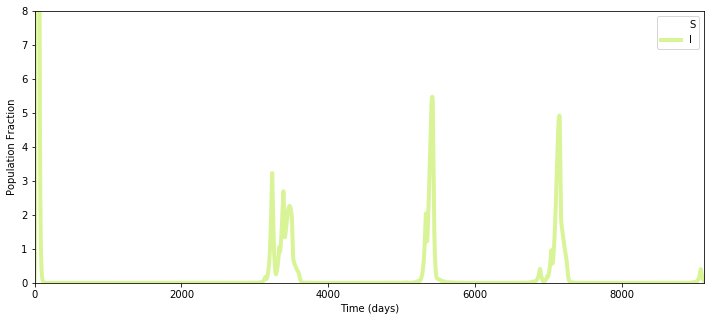

In [47]:
# Defining triplets: (series, color, label)
triplets = ((S, '#FFFFFF', 'S'), (I, '#b4e830', 'I'))
# Plotting
(fig, ax) = aux.plotEpiDynamicsPop(triplets, t, tmax, 8, lw=4)
plt.savefig('./img/MeaslesZoom.png', dpi=500, pad_inches=.01, bbox_inches='tight')